# CelebA Validation EfficientNet

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceOptimisation
from bayes import BayesianRegression

# UTKFace

In [2]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [3]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

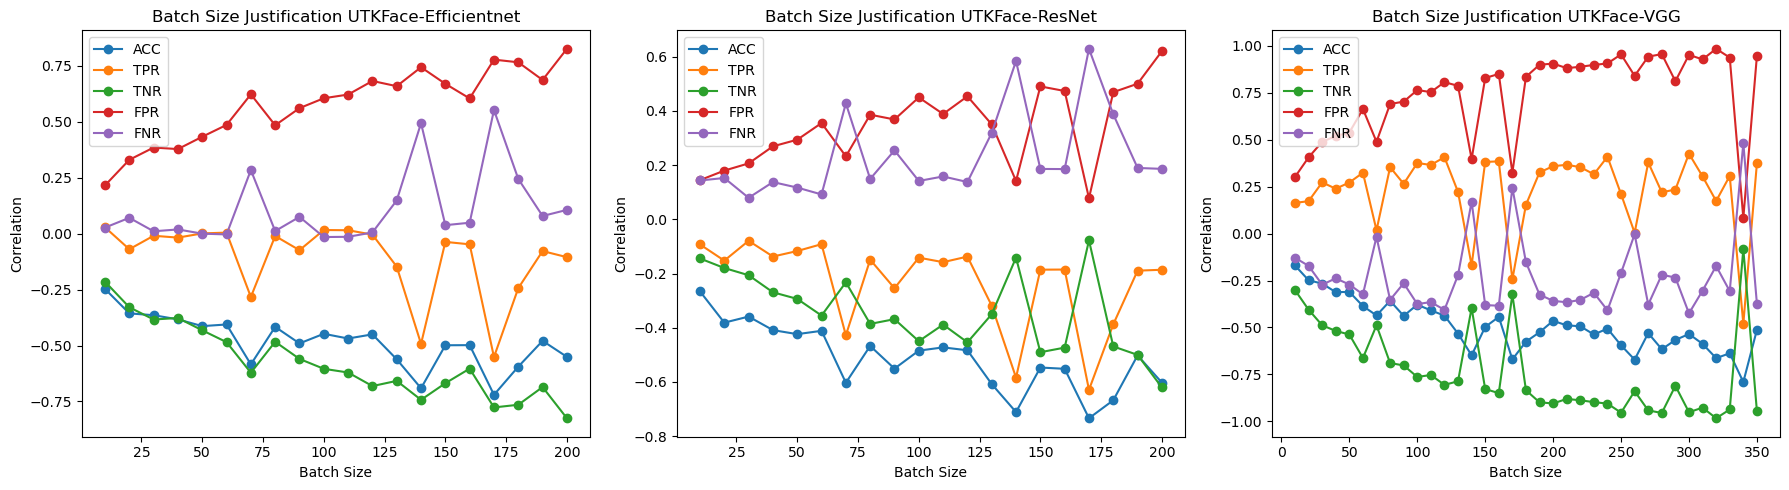

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [7]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=90)
po_resnet.check_optimal_batch_correlation(batch_size=90)
po_vgg.check_optimal_batch_correlation(batch_size=90)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.490670 -0.074318 -0.559864  0.559864  0.074318
ACC      -0.490670  1.000000  0.826731  0.701691 -0.701691 -0.826731
TPR      -0.074318  0.826731  1.000000  0.256723 -0.256723 -1.000000
TNR      -0.559864  0.701691  0.256723  1.000000 -1.000000 -0.256723
FPR       0.559864 -0.701691 -0.256723 -1.000000  1.000000  0.256723
FNR       0.074318 -0.826731 -1.000000 -0.256723  0.256723  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.550979 -0.254313 -0.368426  0.368426  0.254313
ACC      -0.550979  1.000000  0.869087  0.346077 -0.346077 -0.869087
TPR      -0.254313  0.869087  1.000000 -0.104059  0.104059 -1.000000
TNR      -0.368426  0.346077 -0.104059  1.000000 -1.000000  0.104059
FPR       0.368426 -0.346077  0.104059 -1.000000  1.000000 -0.104059
FNR       0.254313 -0.869087 -1.000000  0.104059 -0.104059  1.000000
          distance       ACC      

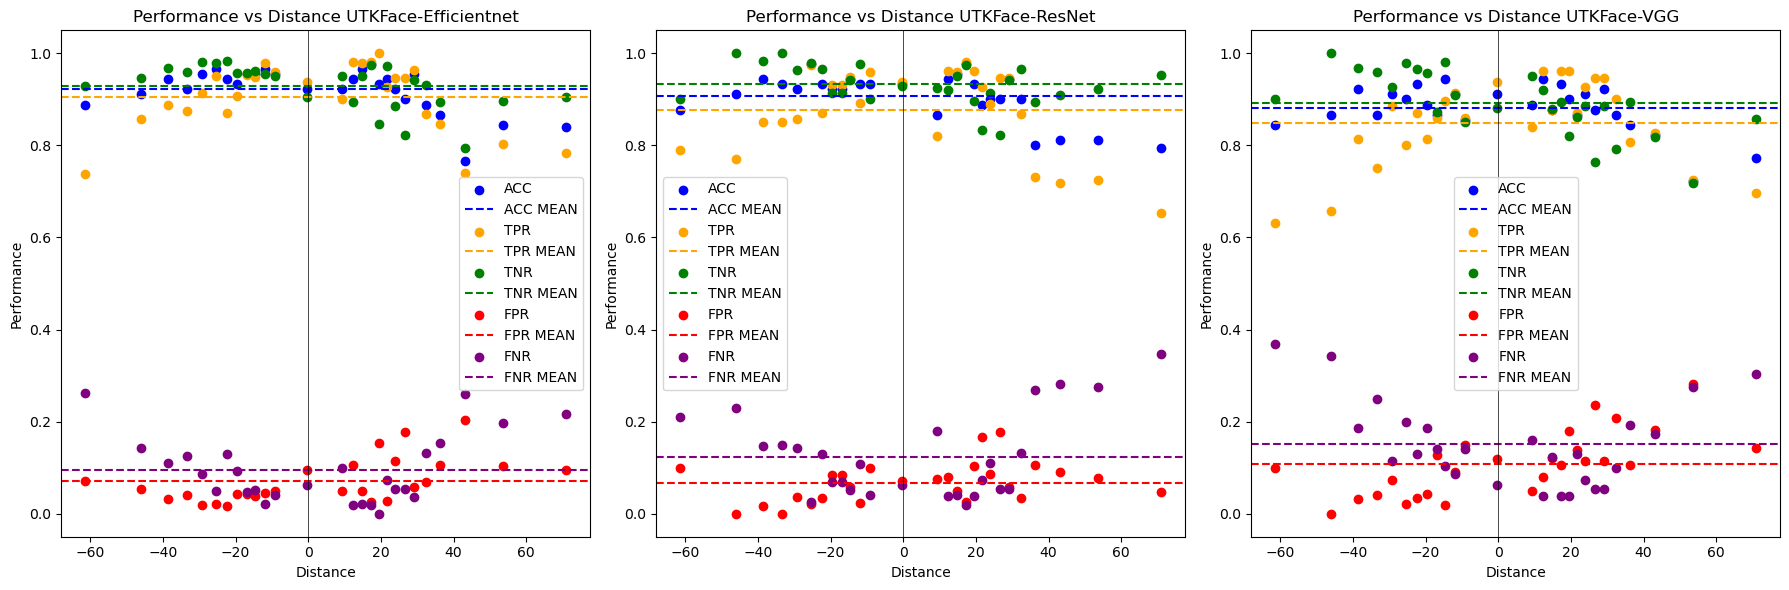

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# Performance Estimation with Bayesian Regression

Modle saved
Modle saved
Modle saved


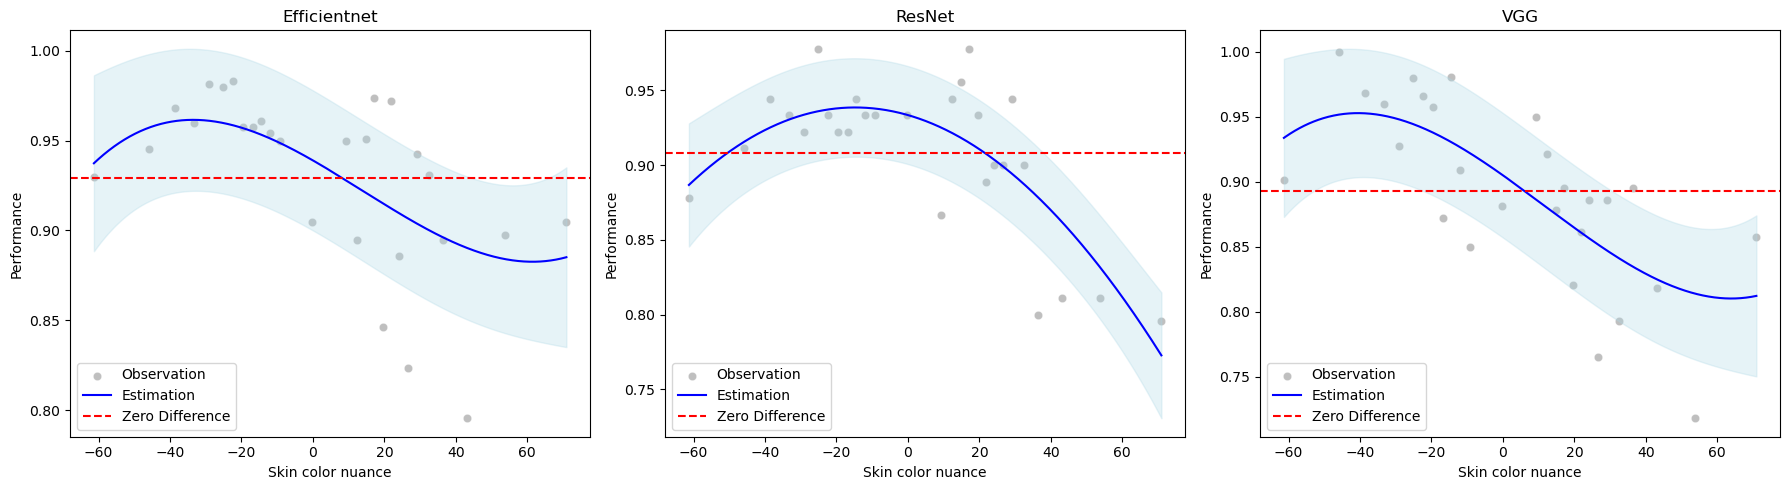

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

start = po_efficientnet.df_performance["distance"].max()
stop = po_efficientnet.df_performance["distance"].min()
num = 1000

X = po_efficientnet.df_performance["distance"]
y = po_efficientnet.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[0], "Efficientnet")
br.save_model(efficientnet_save_file)

start = po_resnet.df_performance["distance"].max()
stop = po_resnet.df_performance["distance"].min()

X = po_resnet.df_performance["distance"]
y = po_resnet.df_performance["ACC"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[1], "ResNet")
br.save_model(resnet_save_file)

start = po_vgg.df_performance["distance"].max()
stop = po_vgg.df_performance["distance"].min()

X = po_vgg.df_performance["distance"]
y = po_vgg.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[2], "VGG")
br.save_model(vgg_save_file)

plt.tight_layout()
plt.show()

# CelebA

In [10]:
db = "CelebA"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [11]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

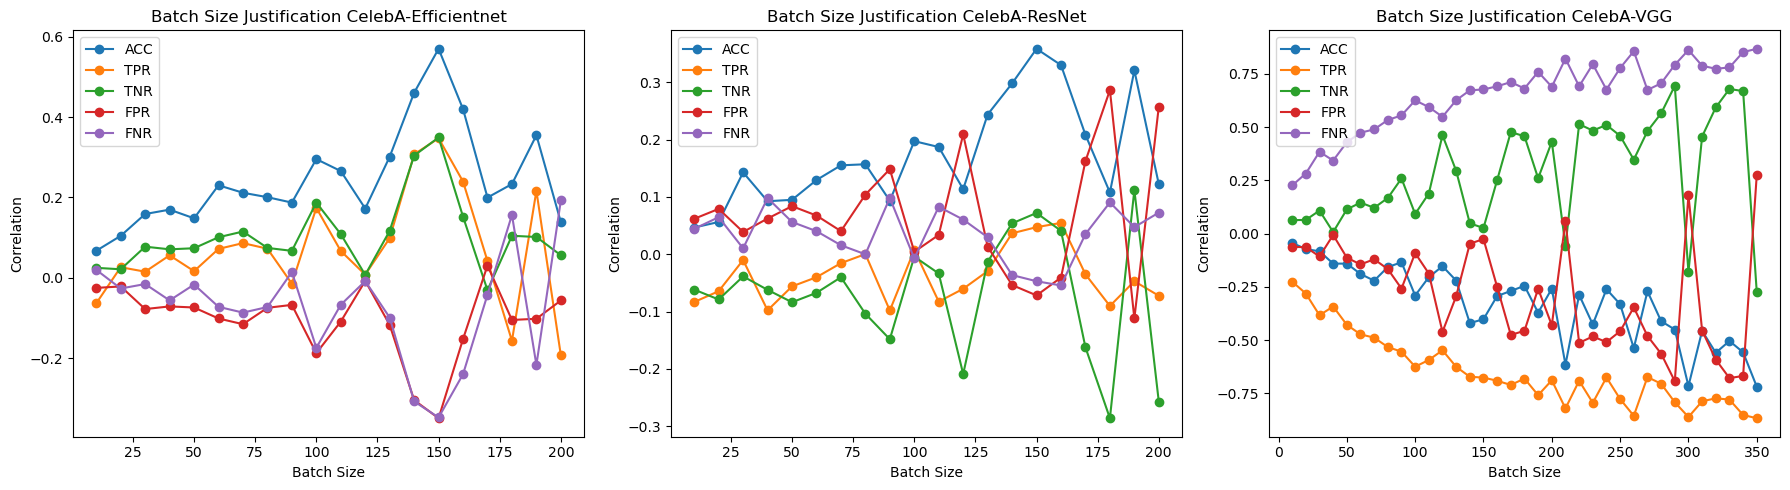

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [15]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=60)
po_resnet.check_optimal_batch_correlation(batch_size=60)
po_vgg.check_optimal_batch_correlation(batch_size=60)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.230305  0.072068  0.101040 -0.101040 -0.072068
ACC       0.230305  1.000000  0.782056  0.652530 -0.652530 -0.782056
TPR       0.072068  0.782056  1.000000  0.095126 -0.095126 -1.000000
TNR       0.101040  0.652530  0.095126  1.000000 -1.000000 -0.095126
FPR      -0.101040 -0.652530 -0.095126 -1.000000  1.000000  0.095126
FNR      -0.072068 -0.782056 -1.000000 -0.095126  0.095126  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.129318 -0.040167 -0.067405  0.067405  0.040167
ACC       0.129318  1.000000  0.828001  0.727132 -0.727132 -0.828001
TPR      -0.040167  0.828001  1.000000  0.347457 -0.347457 -1.000000
TNR      -0.067405  0.727132  0.347457  1.000000 -1.000000 -0.347457
FPR       0.067405 -0.727132 -0.347457 -1.000000  1.000000  0.347457
FNR       0.040167 -0.828001 -1.000000 -0.347457  0.347457  1.000000
          distance       ACC      

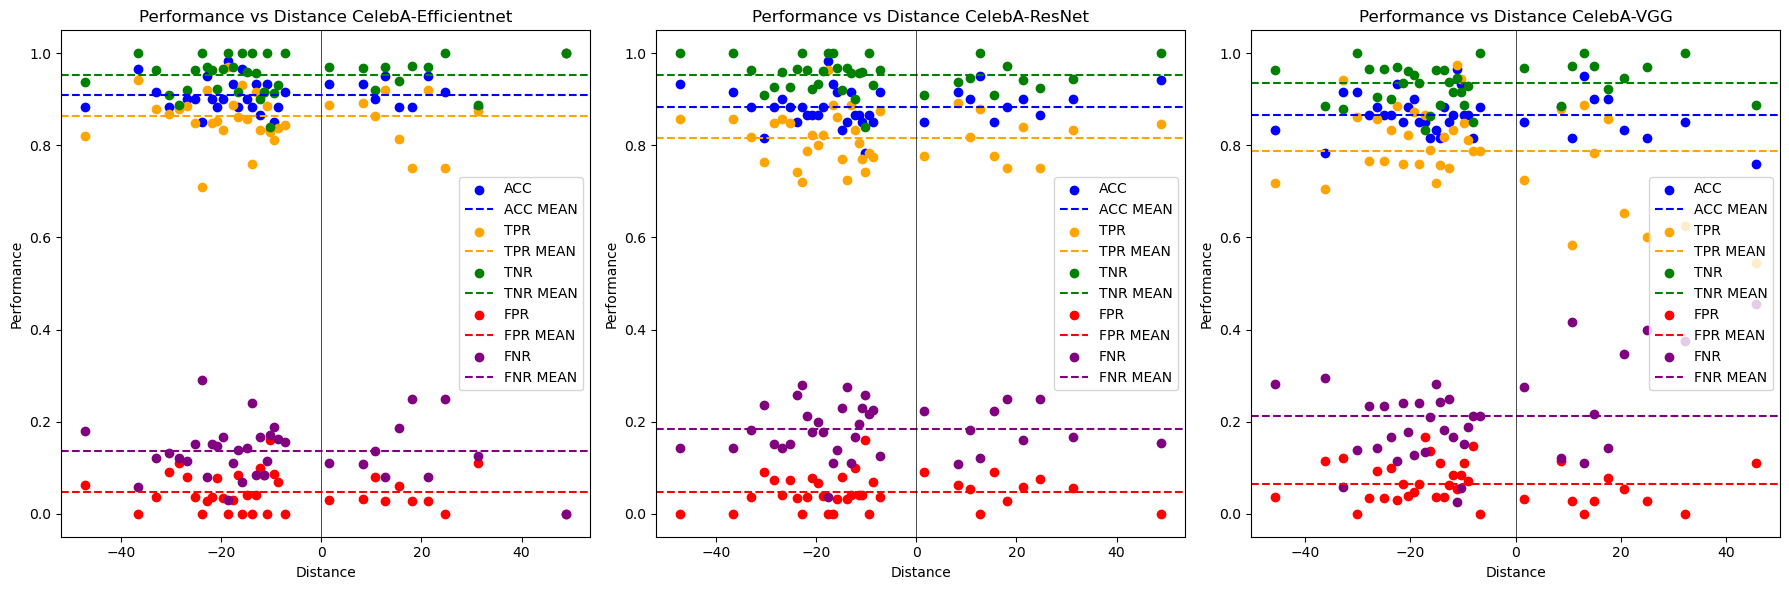

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

Modle saved
Modle saved
Modle saved


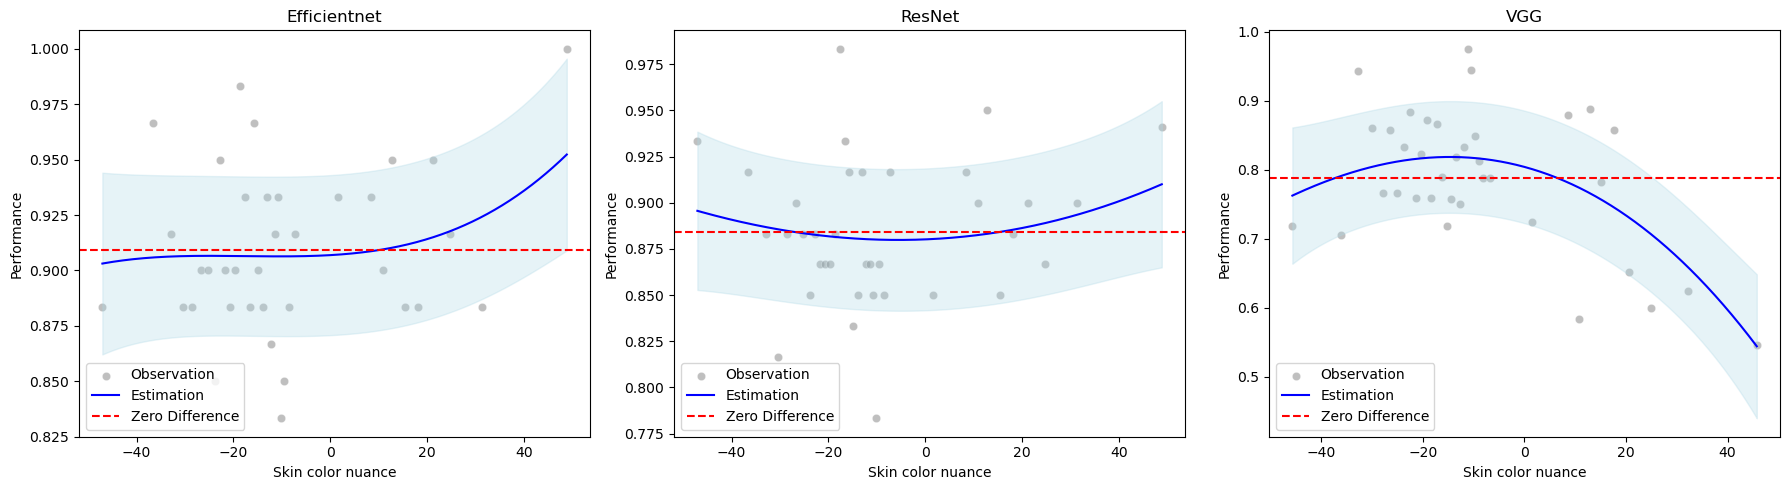

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

start = po_efficientnet.df_performance["distance"].max()
stop = po_efficientnet.df_performance["distance"].min()
num = 1000

X = po_efficientnet.df_performance["distance"]
y = po_efficientnet.df_performance["ACC"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[0], "Efficientnet")
br.save_model(efficientnet_save_file)

start = po_resnet.df_performance["distance"].max()
stop = po_resnet.df_performance["distance"].min()

X = po_resnet.df_performance["distance"]
y = po_resnet.df_performance["ACC"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[1], "ResNet")
br.save_model(resnet_save_file)

start = po_vgg.df_performance["distance"].max()
stop = po_vgg.df_performance["distance"].min()

X = po_vgg.df_performance["distance"]
y = po_vgg.df_performance["TPR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[2], "VGG")
br.save_model(vgg_save_file)

plt.tight_layout()
plt.show()

# HAM10000

In [18]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [19]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

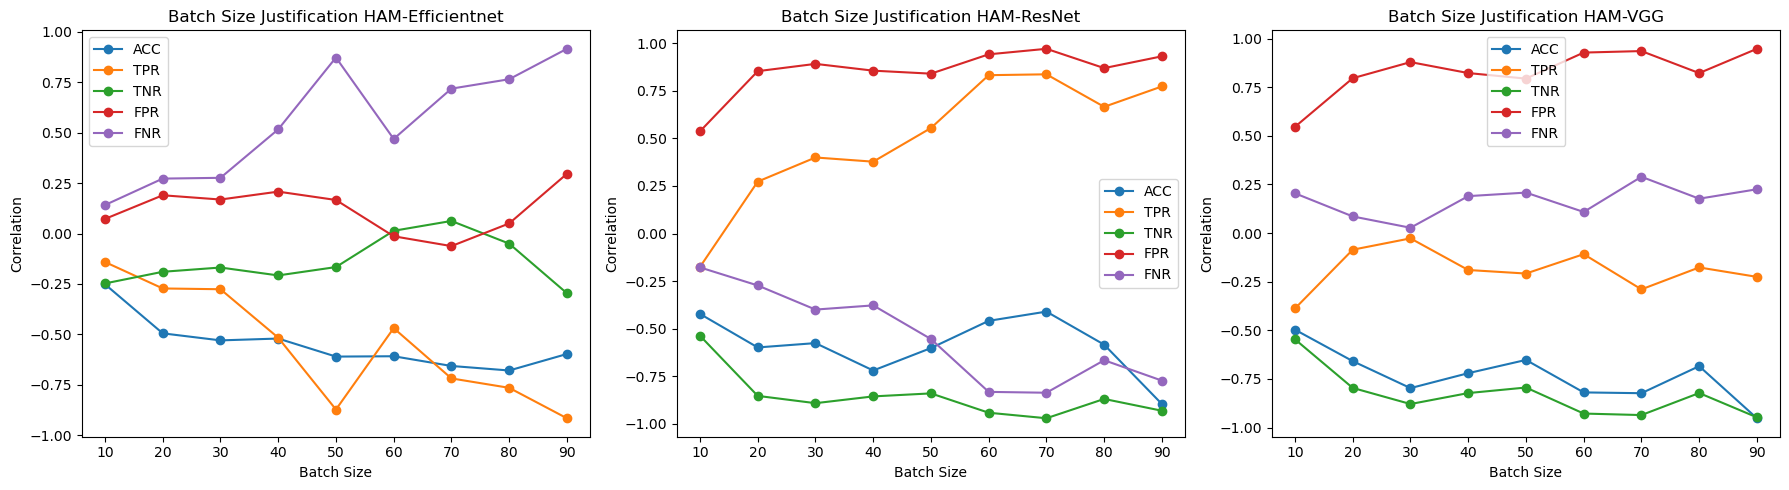

In [20]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0], b_start = 10, b_end = 100, b_step = 10)
    po_resnet.check_batch_size(ax[1], b_start = 10, b_end = 100, b_step = 10)
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 100, b_step = 10)
    plt.tight_layout()
    plt.show()

In [21]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=30)
po_resnet.check_optimal_batch_correlation(batch_size=30)
po_vgg.check_optimal_batch_correlation(batch_size=30)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.529465 -0.276034 -0.168443  0.168443  0.276034
ACC      -0.529465  1.000000  0.494189  0.766030 -0.766030 -0.494189
TPR      -0.276034  0.494189  1.000000 -0.023347  0.023347 -1.000000
TNR      -0.168443  0.766030 -0.023347  1.000000 -1.000000  0.023347
FPR       0.168443 -0.766030  0.023347 -1.000000  1.000000 -0.023347
FNR       0.276034 -0.494189 -1.000000  0.023347 -0.023347  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.575321  0.399257 -0.890692  0.890692 -0.399257
ACC      -0.575321  1.000000 -0.196453  0.611821 -0.611821  0.196453
TPR       0.399257 -0.196453  1.000000 -0.430989  0.430989 -1.000000
TNR      -0.890692  0.611821 -0.430989  1.000000 -1.000000  0.430989
FPR       0.890692 -0.611821  0.430989 -1.000000  1.000000 -0.430989
FNR      -0.399257  0.196453 -1.000000  0.430989 -0.430989  1.000000
          distance       ACC      

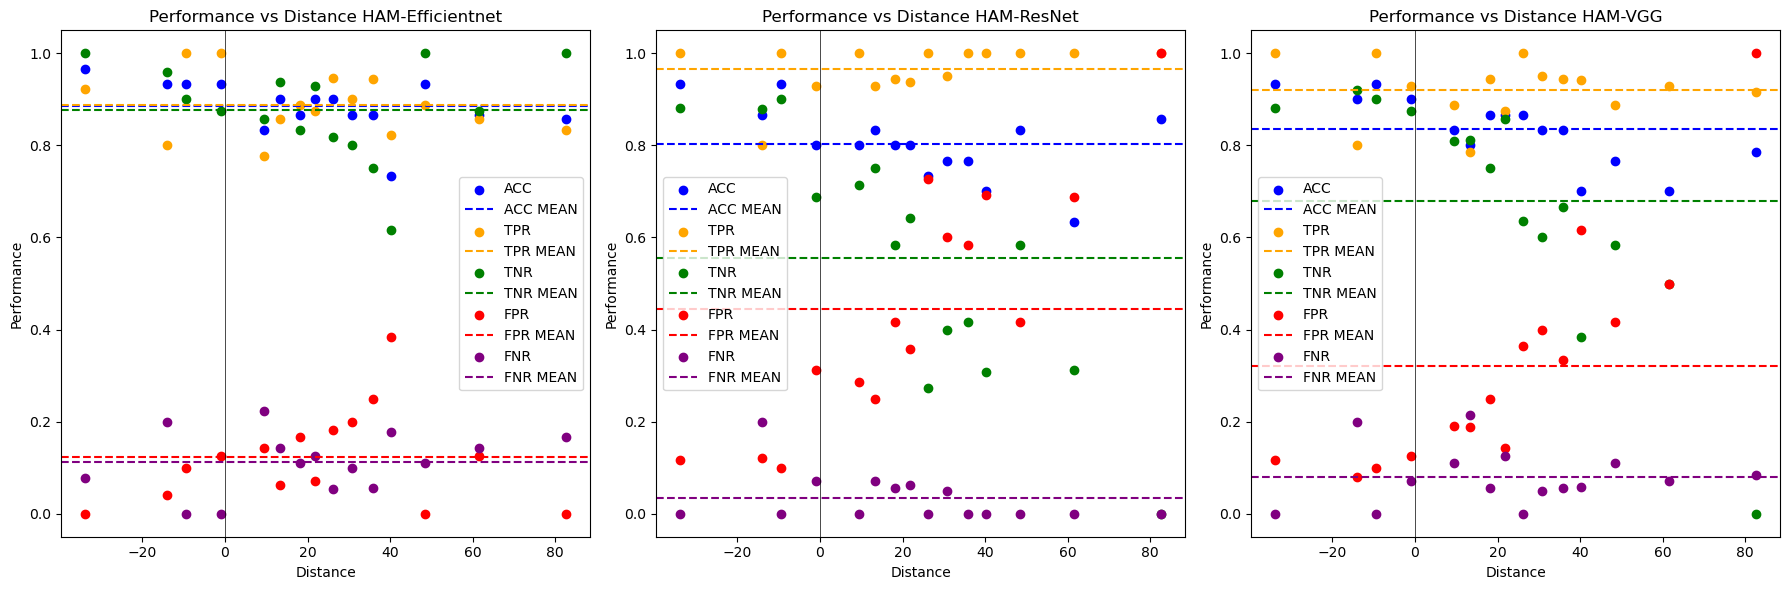

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

Modle saved
Modle saved
Modle saved


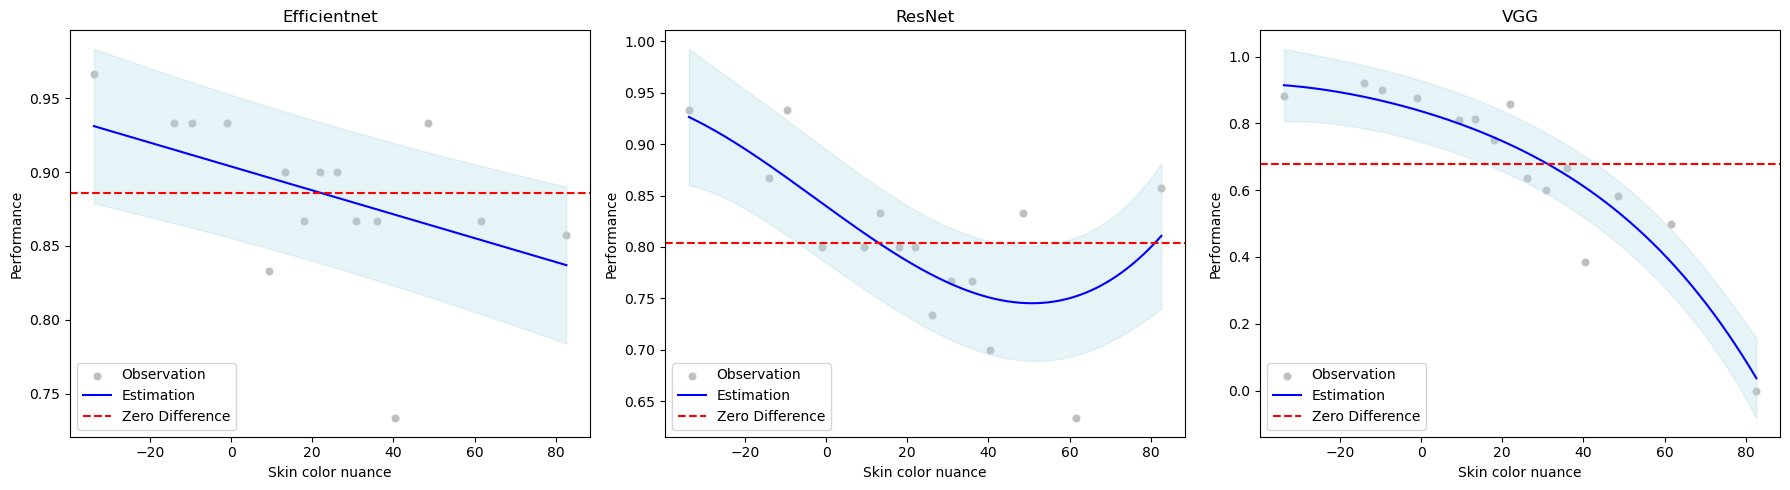

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

start = po_efficientnet.df_performance["distance"].max()
stop = po_efficientnet.df_performance["distance"].min()
num = 1000

X = po_efficientnet.df_performance["distance"]
y = po_efficientnet.df_performance["ACC"]

br = BayesianRegression()
br.fit(X, y, 1)
br.predict(start, stop, num)
br.display(ax[0], "Efficientnet")
br.save_model(efficientnet_save_file)

start = po_resnet.df_performance["distance"].max()
stop = po_resnet.df_performance["distance"].min()

X = po_resnet.df_performance["distance"]
y = po_resnet.df_performance["ACC"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[1], "ResNet")
br.save_model(resnet_save_file)

start = po_vgg.df_performance["distance"].max()
stop = po_vgg.df_performance["distance"].min()

X = po_vgg.df_performance["distance"]
y = po_vgg.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 4)
br.predict(start, stop, num)
br.display(ax[2], "VGG")
br.save_model(vgg_save_file)

plt.tight_layout()
plt.show()